# Credit Card Dataset for Clustering

csca 5632 final project

by Renmin Zhao [05/12/2025 Mon 15:50:28]

https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data

About Dataset

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

By conducting cluster analysis on the behavioral data of approximately 9,000 active credit card users over the past six months, we can identify different consumption patterns, payment habits, credit limit utilization, and customer loyalty, thereby achieving customer segmentation. These insights help formulate personalized marketing strategies, optimize customer service, manage credit risks, and develop financial products that meet market demands, ultimately enhancing customer satisfaction and corporate performance.

# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score

# PD Setting


In [2]:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth',2000 )
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

# Load Data

In [3]:
#load data
train_path ="./data/CC GENERAL.csv"
train_data = pd.read_csv(train_path)
print('Data Size:',train_data.shape)

Data Size: (8950, 18)


# EDA

### View all columns

In [4]:
display(train_data.columns)

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], dtype='object')

* CUST_ID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases 
* BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFF_PURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES : Amount of purchase done in installment
* CASH_ADVANCE : Cash in advance given by the user
* PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently * purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASES_TRX : Numbe of purchase transactions made
* CREDIT_LIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user






### View data information

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Most of the data vary greatly and are unevenly distributed

In [6]:
train_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
train_data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Check missing data

In [8]:

missing_values = train_data.isnull().sum()

print(missing_values[missing_values > 0])


train_data[train_data['MINIMUM_PAYMENTS'].isnull()].head()

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.0,97.0,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.0,0.0,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.0,0.0,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.9,1283.9,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12


In [9]:
print('***data missing num***')
MISSING_COLS =[]
for col in train_data.columns:
    m = train_data[col].isnull().sum()
    if m>0:
        missing_ratio = m / len(train_data)
        print(col,':',m,'--' ,f'{missing_ratio:.4f}')
        MISSING_COLS.append(col)

print('MISSING_COLS:',len(MISSING_COLS))


        

***data missing num***
CREDIT_LIMIT : 1 -- 0.0001
MINIMUM_PAYMENTS : 313 -- 0.0350
MISSING_COLS: 2


### View the number of unique non-repetitive values.

In [10]:
train_data.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

## View distribution of data
Distplot combines the matplotlib.hist function with seaborn kdeplot().

KDE Plot represents the Kernel Density Estimate.

KDE is used for visualizing the Probability Density of a continuous variable.

KDE demonstrates the probability density at different values in a continuous variable

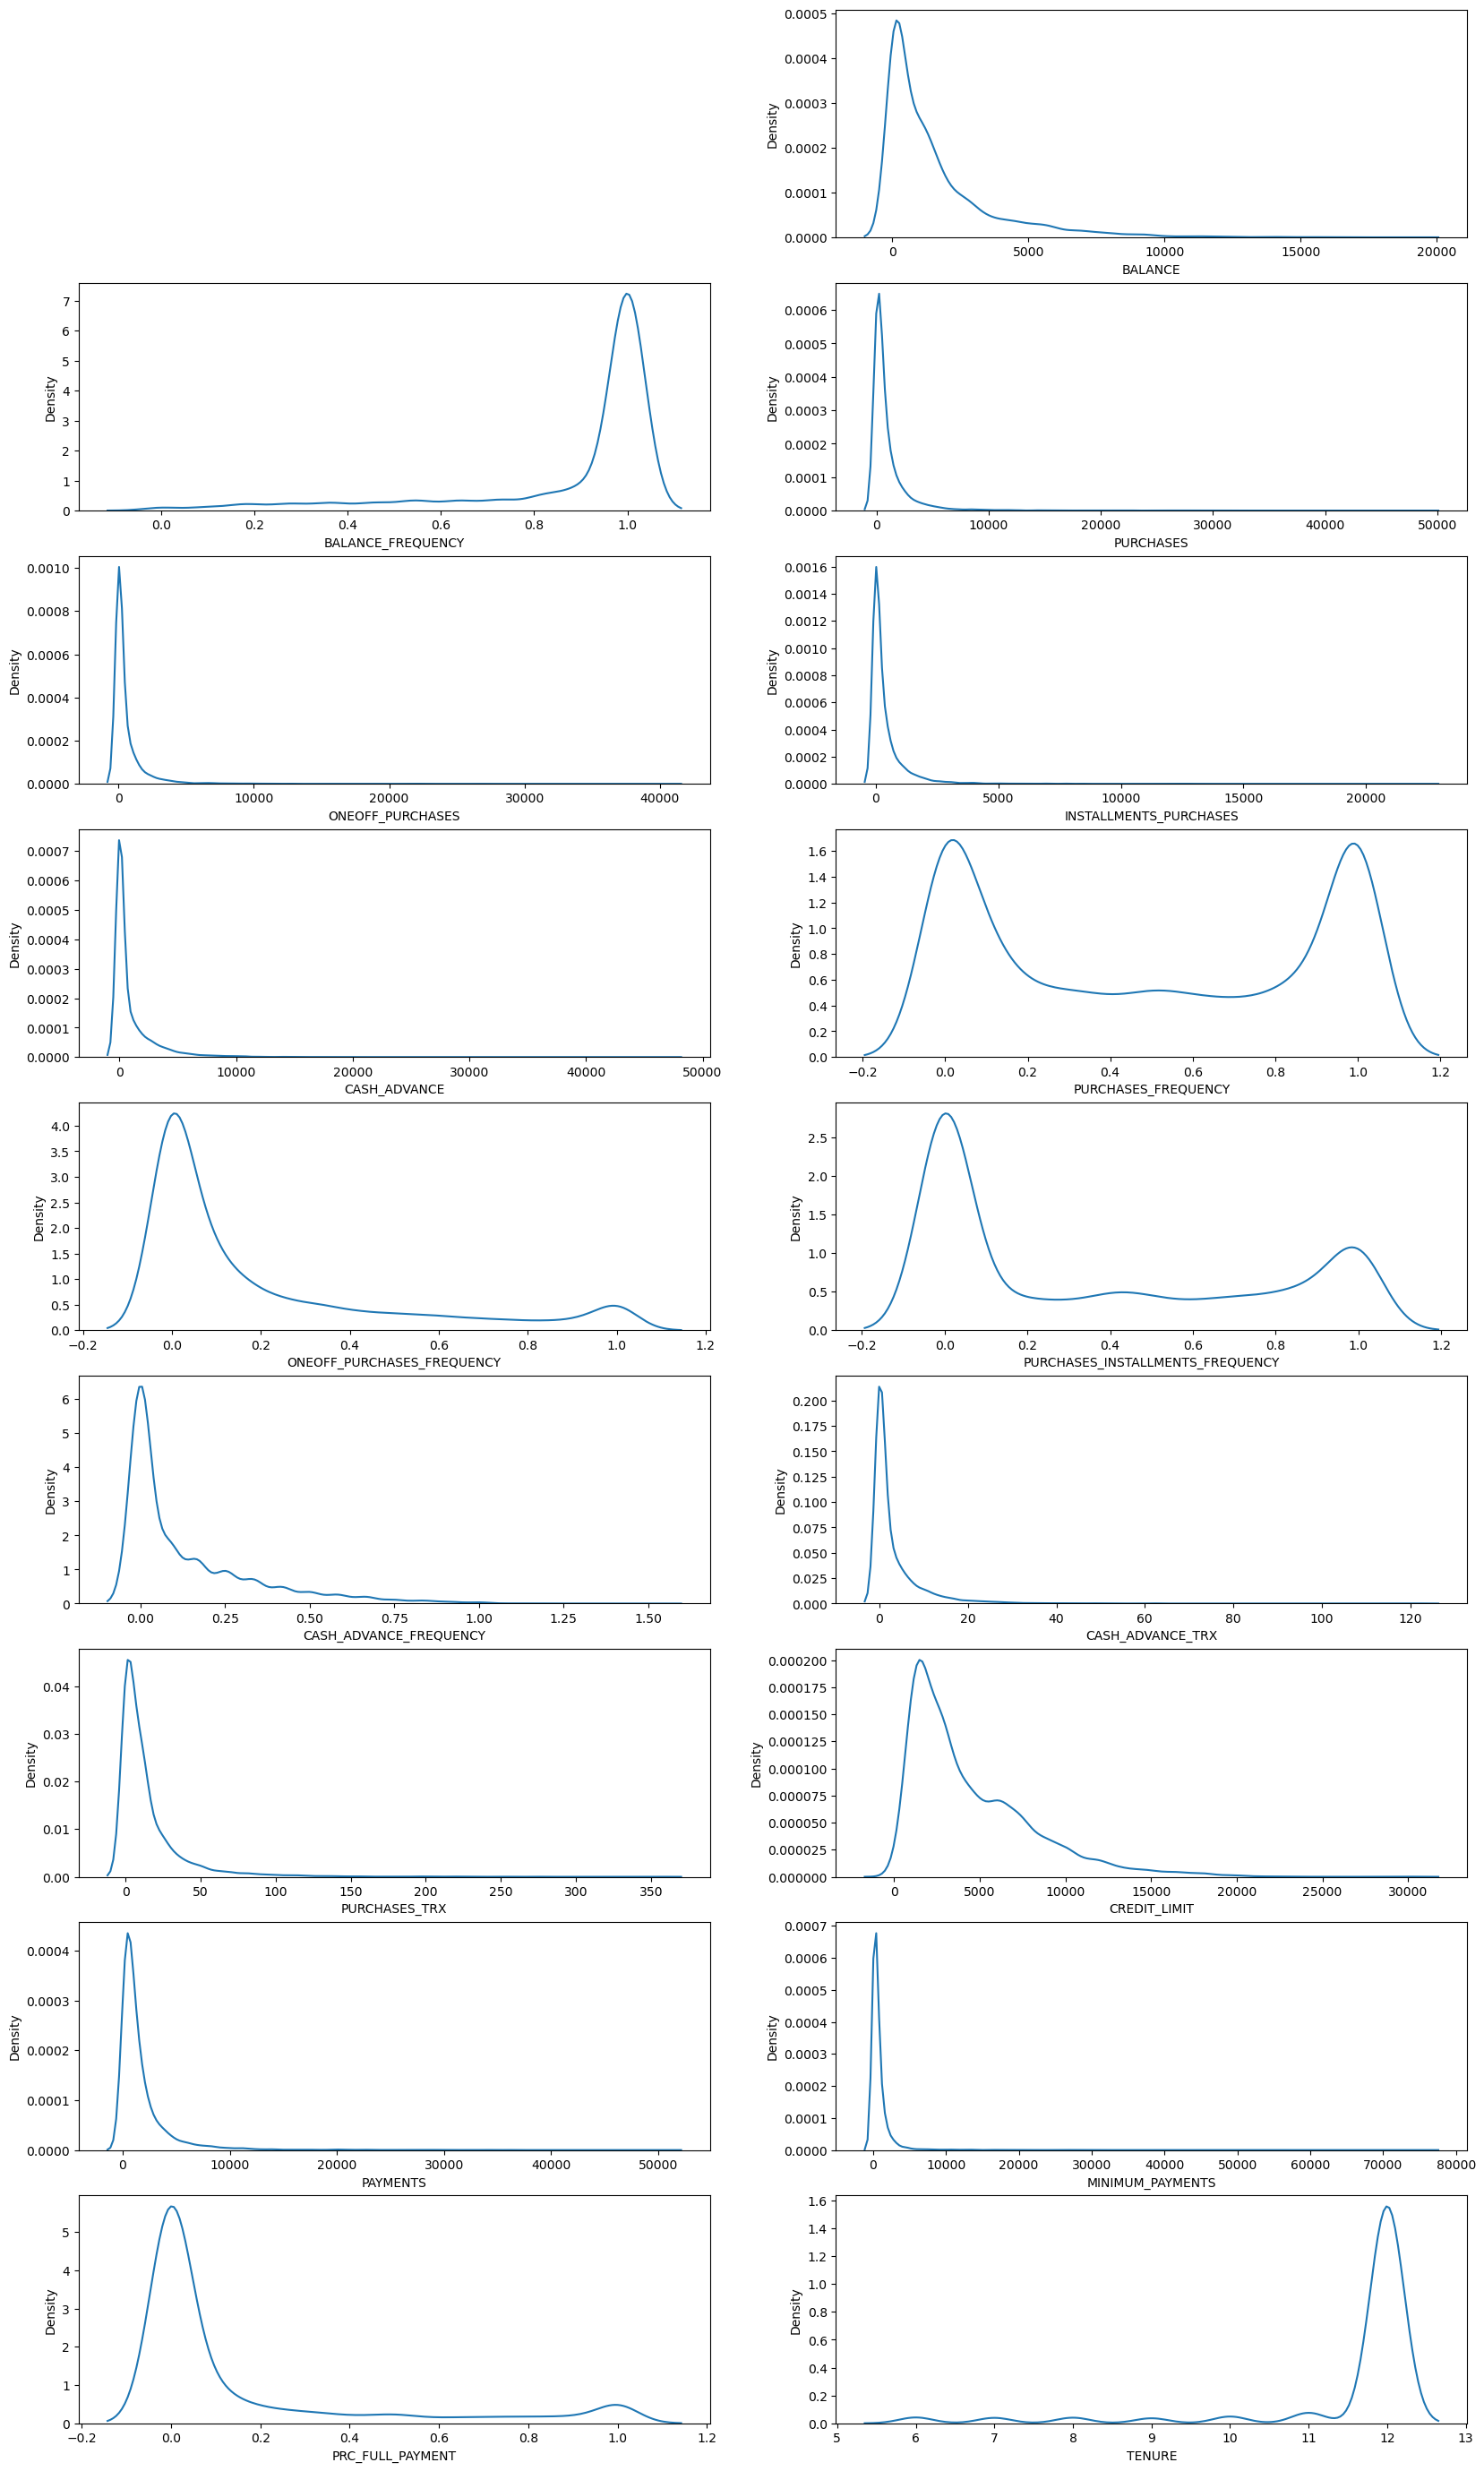

In [11]:
plt.figure(figsize=(20,35))
for i, col in enumerate(train_data.columns):
    if train_data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(train_data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

BALANCE: The distribution of balances is concentrated at lower values, indicating that the credit card balances of most customers are relatively low.

BALANCE_FREQUENCY: The distribution of balance update frequency shows that most customers update their balances frequently.

PURCHASES: The distribution of total purchases is also concentrated at lower values, indicating that most customers spend relatively small amounts.

ONEOFF_PURCHASES: The distribution of one-time purchases is similar to that of total purchases but with a slightly lower peak, suggesting that while large one-time purchases exist, they are less frequent than regular purchases.

INSTALLMENTS_PURCHASES: The distribution of installment purchases is relatively uniform, indicating that customers make installment purchases across various amounts.

CASH_ADVANCE: The distribution of cash advances is concentrated at lower values, indicating that most customers rarely use the cash advance feature.

PURCHASES_FREQUENCY: The distribution of purchase frequency shows that most customers have a relatively high purchase frequency.

ONEOFF_PURCHASES_FREQUENCY: The distribution of one-time purchase frequency is similar to that of total purchase frequency but with a slightly lower peak.

PURCHASES_INSTALLMENTS_FREQUENCY: The distribution of installment purchase frequency is relatively uniform.

CASH_ADVANCE_FREQUENCY: The distribution of cash advance frequency is concentrated at lower values.

CASH_ADVANCE_TRX: The distribution of cash advance transaction counts is concentrated at lower values.

PURCHASES_TRX: The distribution of purchase transaction counts is relatively uniform.

CREDIT_LIMIT: The distribution of credit limits is concentrated at lower values, indicating that most customers have relatively low credit limits.

PAYMENTS: The distribution of payment amounts is concentrated at lower values.

MINIMUM_PAYMENTS: The distribution of minimum payments is concentrated at lower values.

TENURE: The distribution of card tenure is concentrated at shorter durations, indicating that most customers are new.

### View correlation coefficient

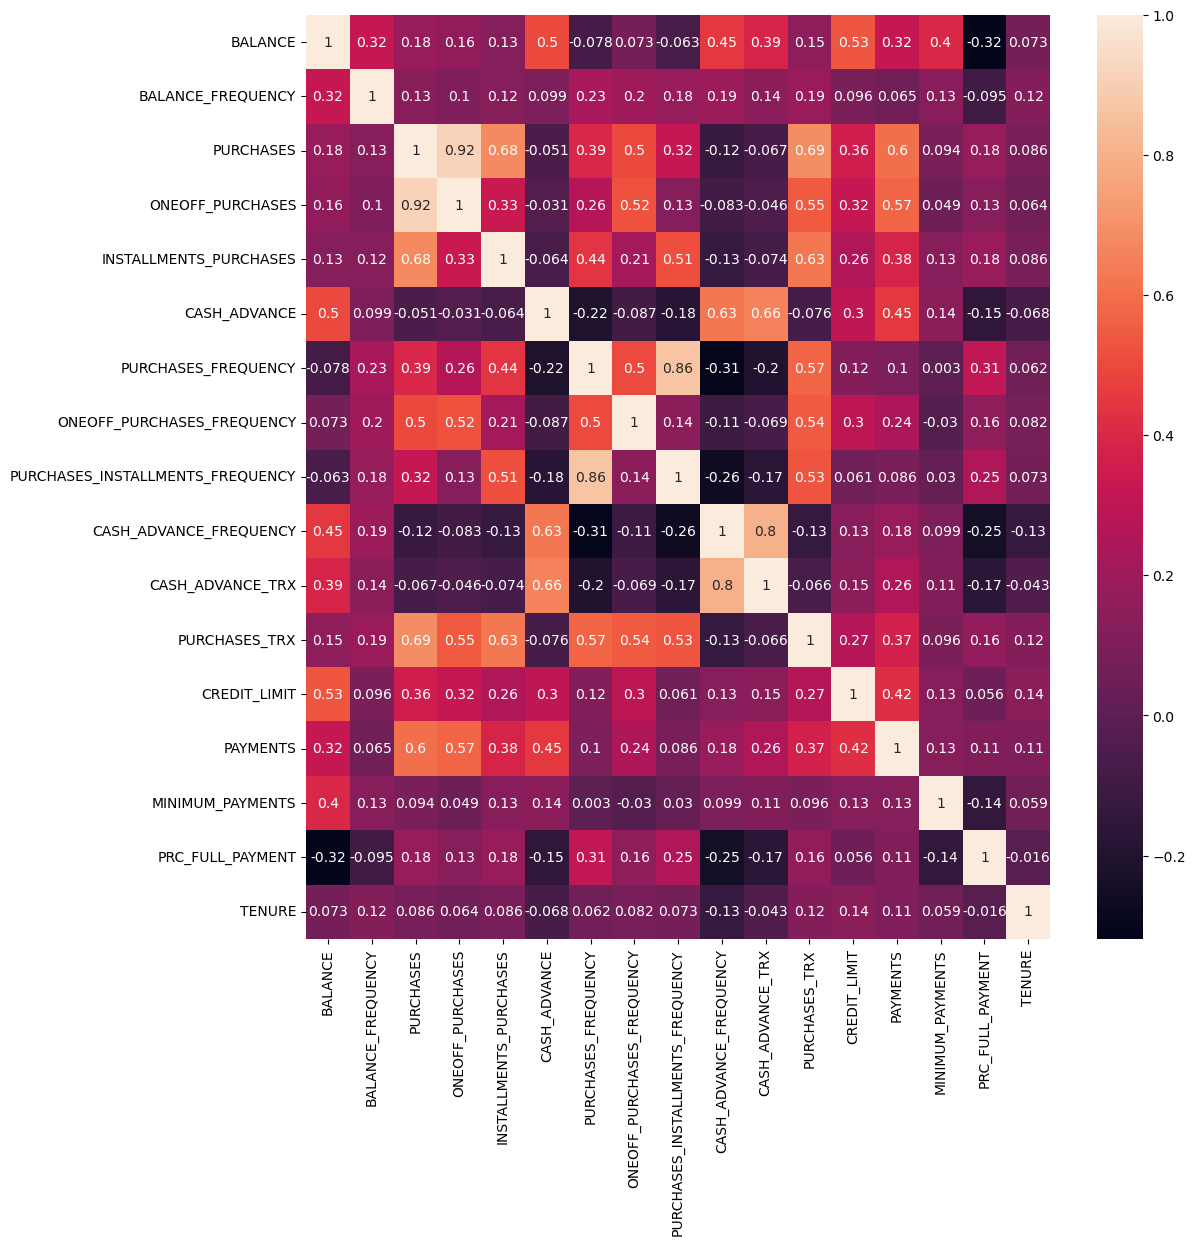

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(train_data.drop('CUST_ID', axis=1).corr(), annot=True)
plt.show()

The correlation coefficient between BALANCE and CASH_ADVANCE and CREDIT_LIMIT is 0.5, indicating that there is a strong positive correlation between credit card balance and the amount and limit of cash advance.



There is a high positive correlation among the variables such as PURCHASES, ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES, indicating that the consumption behavior of customers has a certain degree of coherence and consistency.

The correlation between CREDIT_LIMIT and PAYMENTS, as well as MINIMUM_PAYMENTS is relatively high, indicating that the credit limit is closely related to the repayment behavior of customers.


# Data Process

## Filling missing data

In [13]:

print(train_data['MINIMUM_PAYMENTS'].mean(),
      train_data['MINIMUM_PAYMENTS'].median()
)

print( train_data['MINIMUM_PAYMENTS'].mode())

864.2065423050828 312.343947
0    299.351881
Name: MINIMUM_PAYMENTS, dtype: float64


In [14]:
train_data['MINIMUM_PAYMENTS'].fillna(train_data['MINIMUM_PAYMENTS'].median(), inplace=True)

## Drop unusual data

In [15]:
train_data = train_data.drop('CUST_ID', axis=1)
train_data = train_data.dropna(subset=['CREDIT_LIMIT'])

In [16]:
train_data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Normalized data

In [17]:

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(train_data), columns=train_data.columns)

In [18]:
df_standardized.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.302425,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.097455,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.093329,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.228336,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.257294,-0.525588,0.360541


## Reduce the dimension using PCA
By calling pca.fit(df_standardized), we are computing the principal components from  dataset. The explained variance ratio shows the amount of variance 'explained' or captured by each principal component.

[2.72951331e-01 2.03143936e-01 8.81230235e-02 7.48047159e-02
 6.22536932e-02 5.73945620e-02 4.88380094e-02 4.29857745e-02
 3.79988506e-02 3.08007656e-02 2.37238129e-02 1.77346091e-02
 1.42796504e-02 1.21690287e-02 1.01269862e-02 2.67056640e-03
 6.85241052e-07]


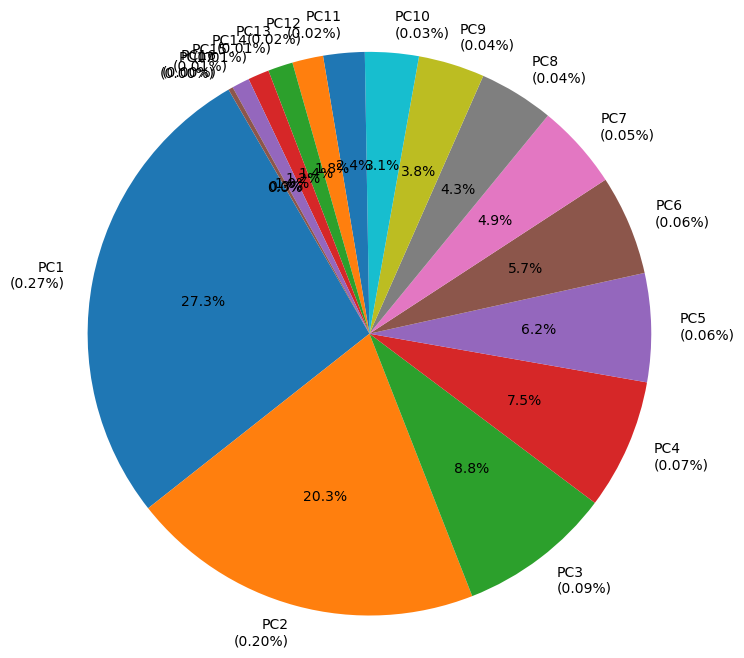

In [19]:

pca = PCA()
pca.fit(df_standardized)
# Understand the proportion of the variance of the original data explained by each Principal Component (PC)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

# Explained Variance Ratio by Principal Components
plt.figure(figsize=(8, 8))
plt.pie(explained_variance_ratio, 
        labels=[f'PC{i+1}\n({var:.2f}%)' for i, var in enumerate(explained_variance_ratio)], 
        autopct='%1.1f%%', 
        startangle=120)
plt.axis('equal') 
plt.show()

In [20]:

pca = PCA(n_components=10)
pca_result = pca.fit_transform(df_standardized)

# Model Training


We will be using three common clustering algorithms to train our data. This process involves applying K-means, DBSCAN, and Gaussian Mixture Models (GMM) to identify patterns or groupings within the dataset.

**K-means:**

This is a distance-based clustering algorithm that partitions the data into K clusters based on the similarity of data points. It works by iteratively assigning each data point to the nearest cluster center (centroid), then recalculating the centroids based on the assigned points. The process repeats until the centroids no longer change significantly. K-means is fast and effective for spherical clusters of similar size, but it requires specifying the number of clusters (K) in advance and is sensitive to outliers and initial centroid positions.

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**

This is a density-based clustering method that groups together points that are closely packed, while marking points in low-density regions as noise. It does not require specifying the number of clusters beforehand and can find clusters of arbitrary shapes. DBSCAN uses two parameters: epsilon (ε), which defines the radius of the neighborhood around a point, and minPts, the minimum number of points required to form a dense region. It's especially good at identifying noise and handling clusters with varying densities.

**Gaussian Mixture Model (GMM):**

This is a probabilistic model that assumes all data points come from a mixture of several Gaussian distributions with unknown parameters. GMM assigns probabilities to each data point indicating how likely it is to belong to each cluster (soft clustering). It uses the Expectation-Maximization (EM) algorithm to estimate the parameters of the Gaussian distributions. Compared to K-means, GMM is more flexible because it considers both the mean and variance of clusters and can capture more complex cluster shapes such as elliptical distributions.

## Visualization of high-dimensional datasets

t-SNE, which stands for t-Distributed Stochastic Neighbor Embedding, It is particularly well suited for the visualization of high-dimensional datasets.

After reducing the dimensionality to two-dimensional space through t-SNE, it is visually displayed according to different cluster labels. In this way, the distribution and aggregation between each cluster can be intuitively seen.

In [21]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(pca_result)

In [22]:
def view_clustering_result(modelname,lables):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=lables , cmap='coolwarm', alpha=0.6)
    plt.xlabel('tsne Component 1')
    plt.ylabel('tsne Component 2')
    plt.title(f'{modelname} Clustering Results with tsne')
    unique_labels = set(lables)
    legend_labels = [f"Cluster {label}" if label != -1 else "Outliers" for label in unique_labels]
    handles, _ = scatter.legend_elements()
    plt.legend(handles, legend_labels, title="Clusters")
    plt.grid()
    plt.show()
    

## K-means
the Optimal Number of Clusters Using Elbow Method

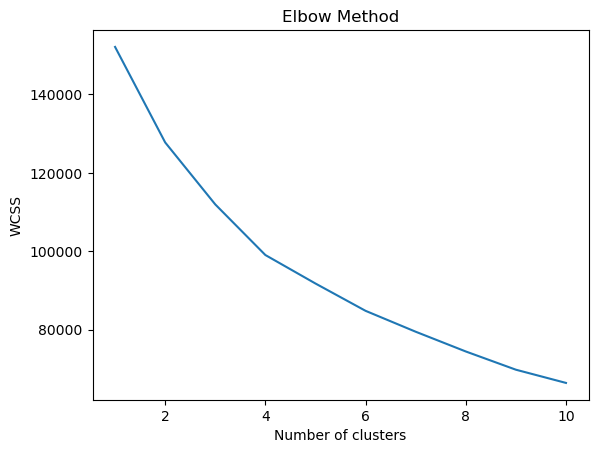

In [23]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10,random_state=42)
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
optimal_k =4

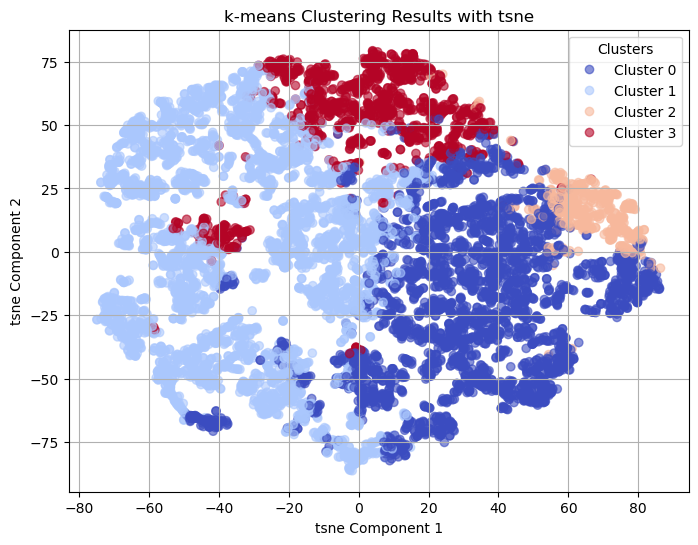

In [25]:
kmeans = KMeans(n_clusters=optimal_k, n_init=10,random_state=42)
kmeans_lables= kmeans.fit_predict(pca_result)
view_clustering_result('k-means',kmeans_lables)

The data are clearly divided into four large clusters (Cluster 0-3), each of which contains a large number of samples, with uniform color distribution and clear boundaries. k-means assumes that clusters are spherical and of similar size, and is suitable for situations where the data distribution is relatively uniform

## DBSCAN

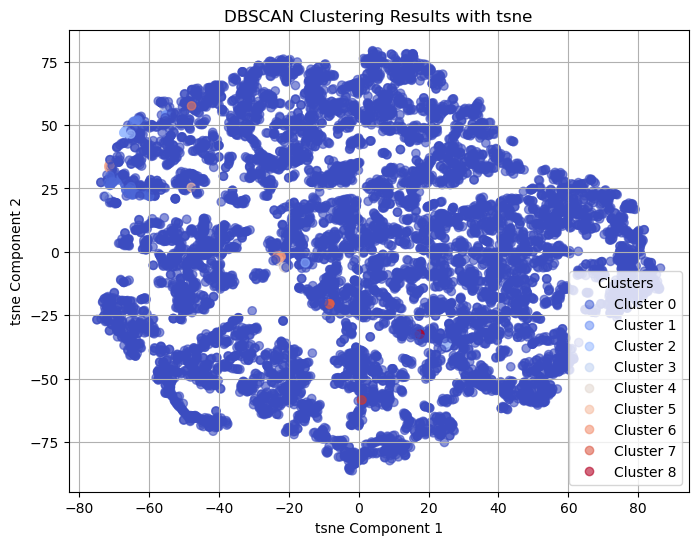

In [26]:
EPS = 0.1
min_samples = 5
dbscan = DBSCAN(eps=EPS,min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(pca_result)

view_clustering_result('DBSCAN',dbscan_labels)

Most of the points in the figure have been assigned to Cluster 0, and only a very small number of points have been assigned to clusters 1-7. The color distribution is extremely uneven, indicating that DBSCAN only recognizes one main cluster under the current parameter Settings, and the other clusters can almost be ignored. Even by adjusting the two parameters of EPS and min_samples, the internal structure of the data could not be effectively distinguished.

## Gaussian Mixture Model

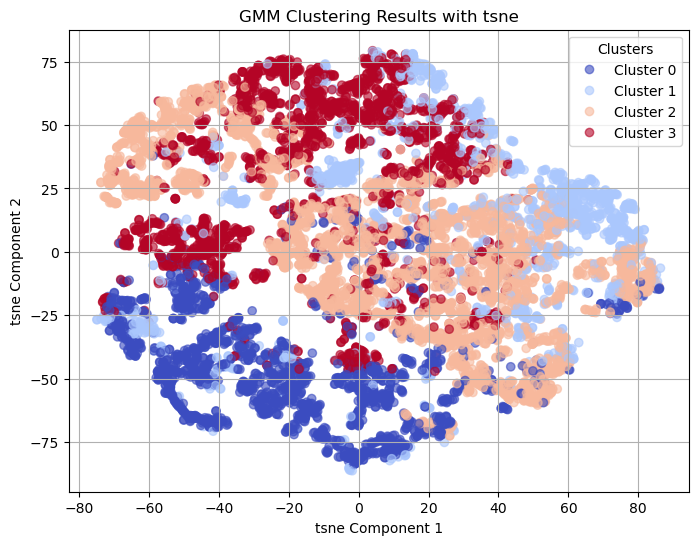

In [27]:
gmm = GaussianMixture(n_components = optimal_k) 
gmm_labels = gmm.fit_predict(pca_result)
view_clustering_result('GMM',gmm_labels)

GMM also divides the data into four clusters (Cluster 0-3), but the boundaries between the clusters are more blurred and there are more overlapping areas. This distribution may better reflect the true structure of the data.

# Analyze the clustering results

The boundaries of clusters are clear and highly interpretable, and k-means is a better choice.

## View distribution of all clusters
Generate a histogram for each cluster to help understand the distribution characteristics of each feature within different clusters

In [ ]:
def horizontal_histplot(data, **kwargs):
    plt.hist(data, orientation='horizontal', **kwargs)
    
def distribution_cluster(labels):
    # use origin data
    clusters = pd.concat([train_data, pd.DataFrame({'cluster': labels})], axis=1)
    print(clusters.head(5))
    for c in clusters.columns.drop('cluster'):
        grid = sns.FacetGrid(clusters, col='cluster')
        grid.map(horizontal_histplot, c)
        grid.set_axis_labels(x_var="Density", y_var=c) 
        plt.show()

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster
0    40.900749           0.818182      95.40              0.00                    95.4      0.000000             0.166667                    0.000000                          0.083333                0.000000               0.0            2.0        1000.0   201.802084        139.509787          0.000000    12.0      1.0
1  3202.467416           0.909091       0.00              0.00                     0.0   6442.945483             0.000000                    0.000000                          0.000000                0.250000               4.0            0.0        7000.0  4103.032597       1072.340217          0.222222    12.0      3.0
2  2495.148862           1.000000    

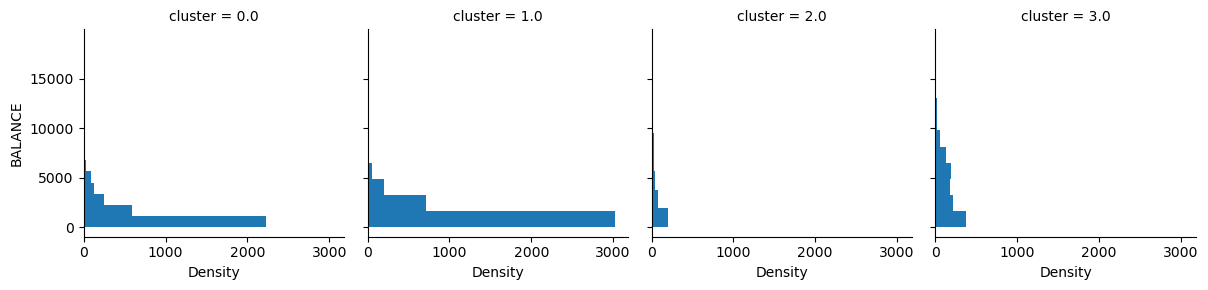

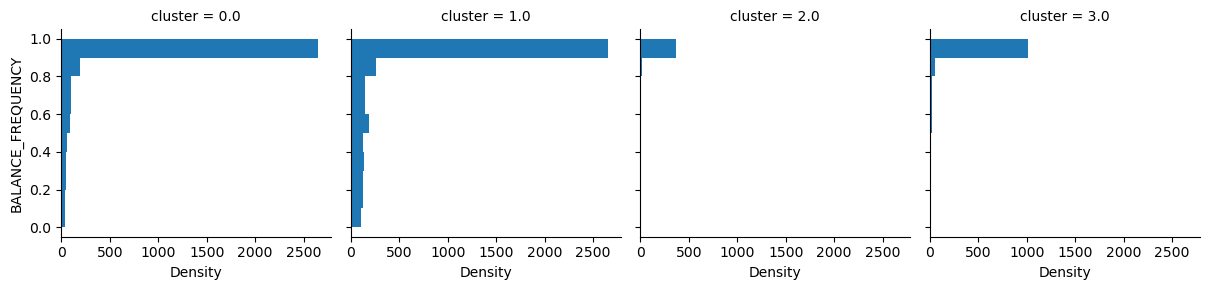

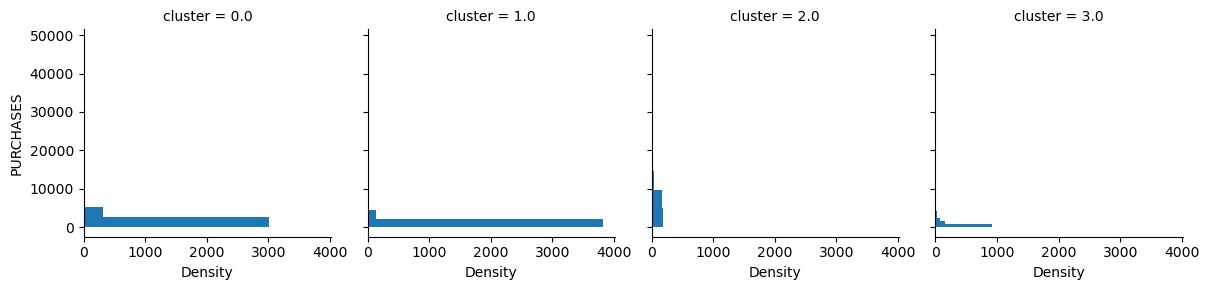

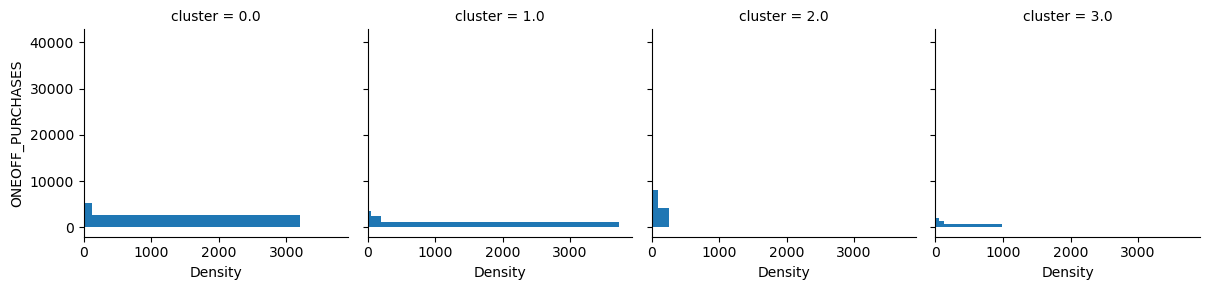

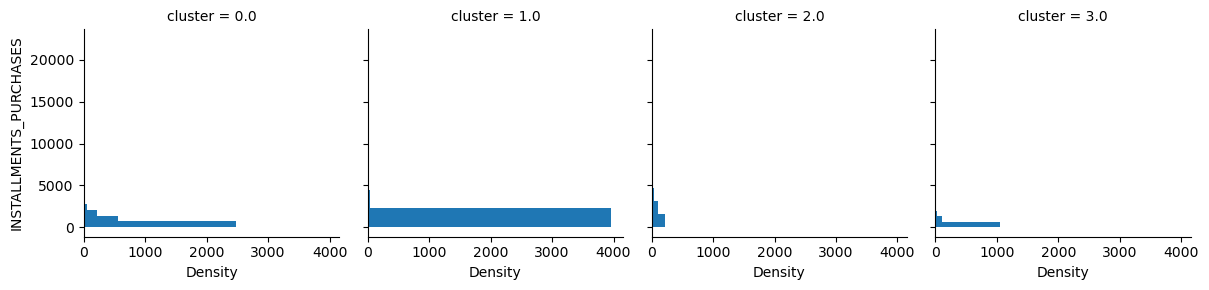

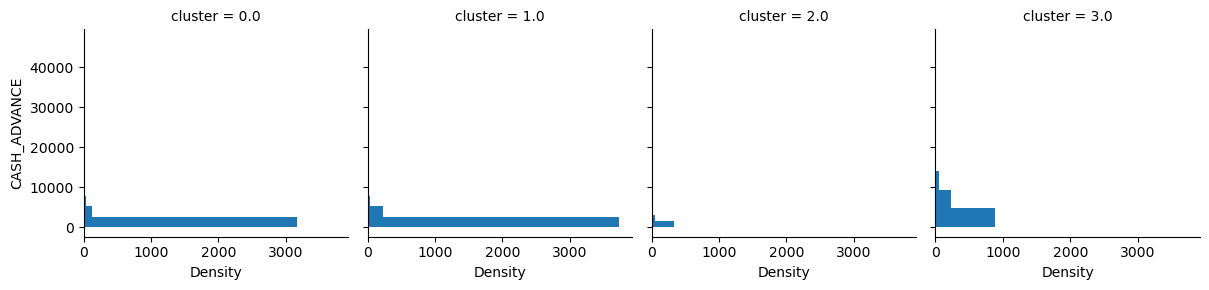

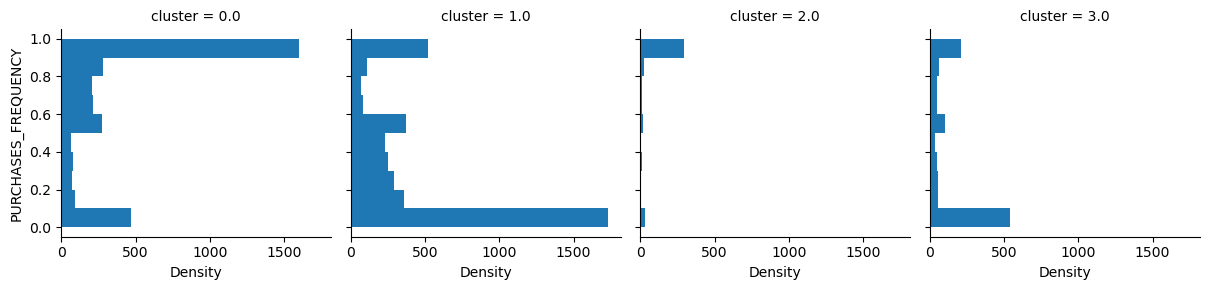

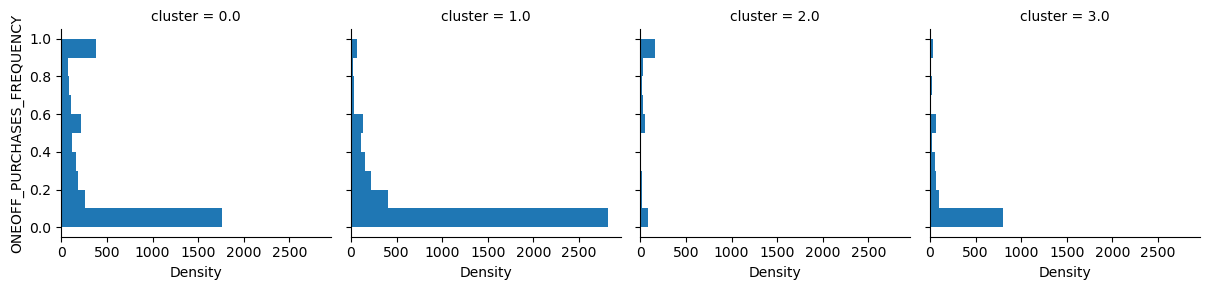

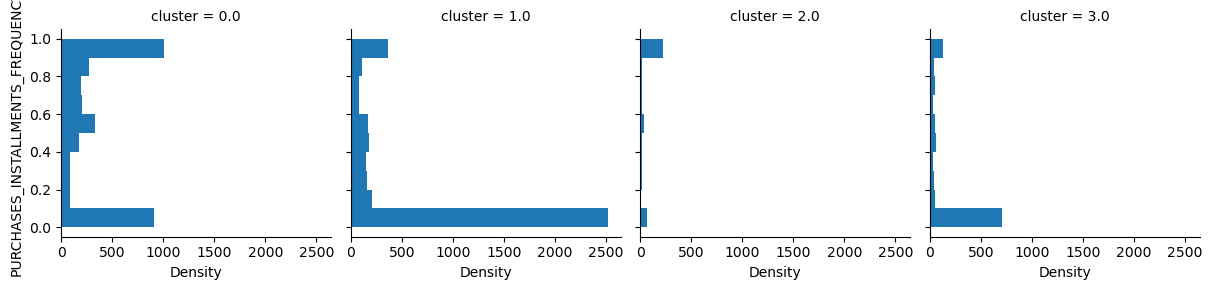

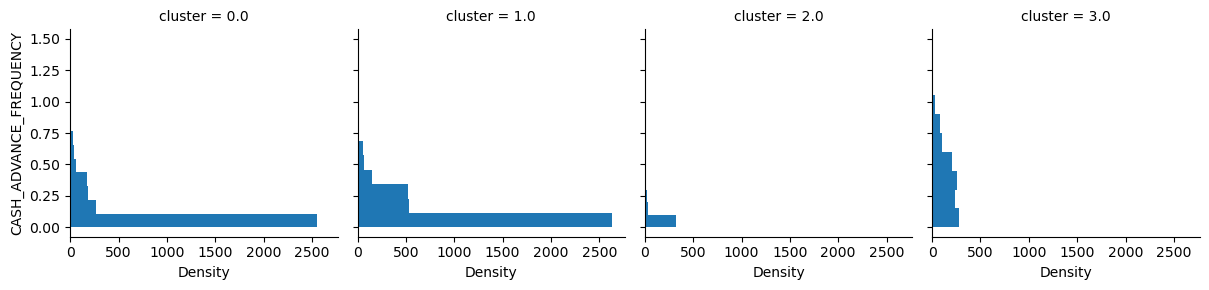

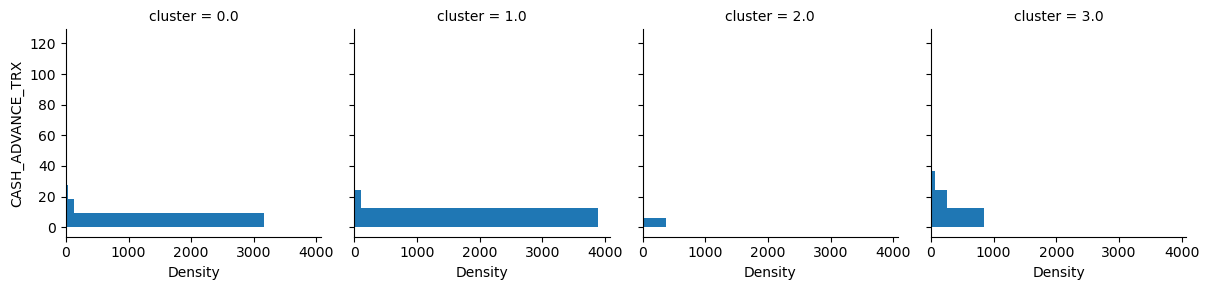

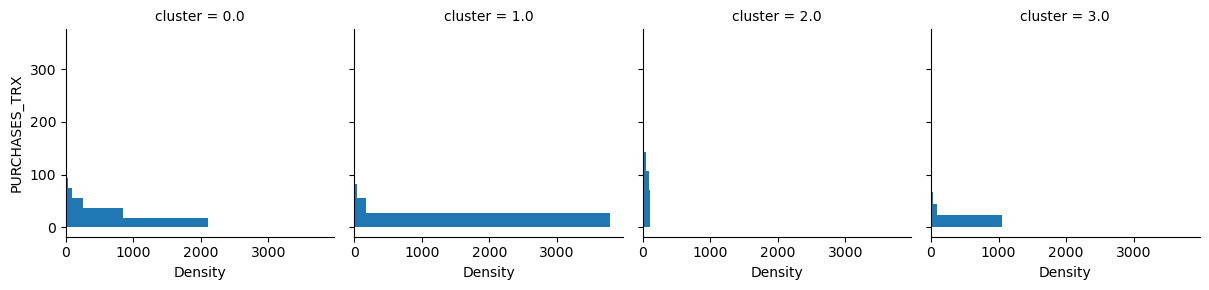

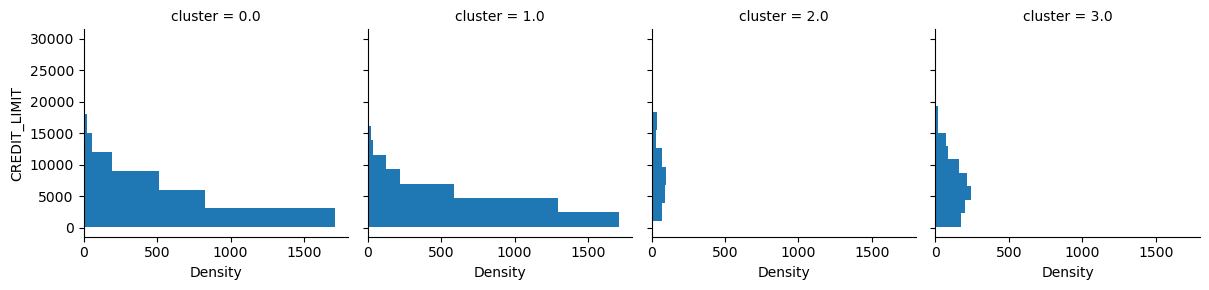

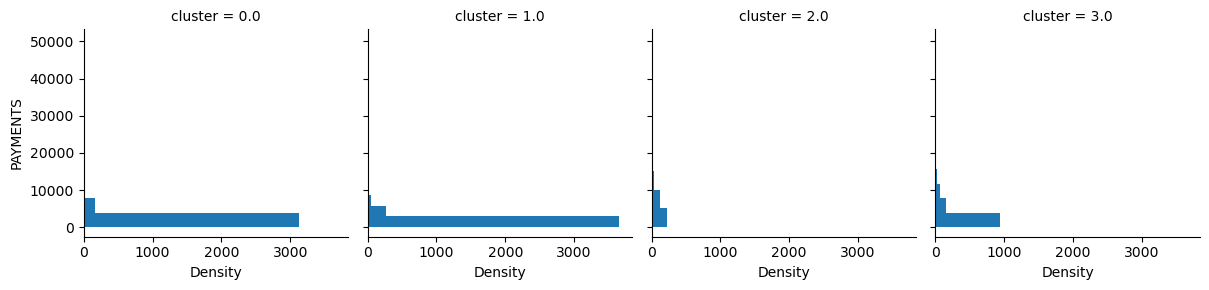

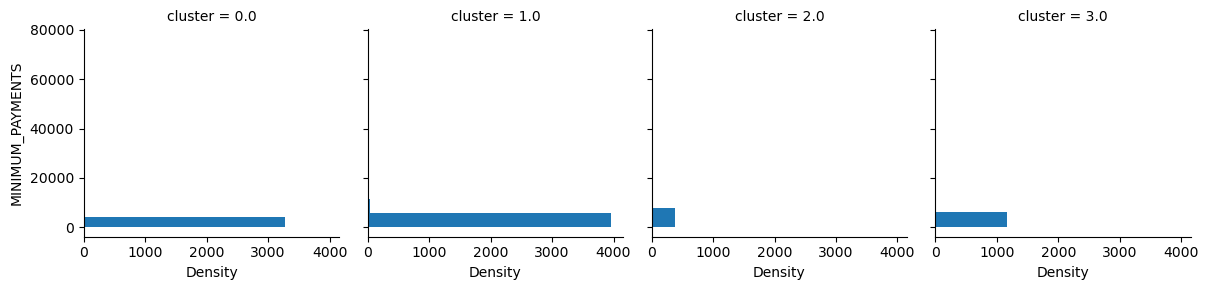

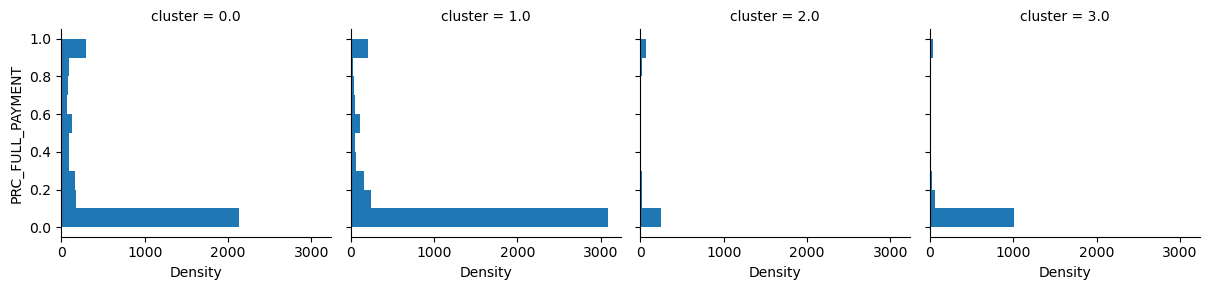

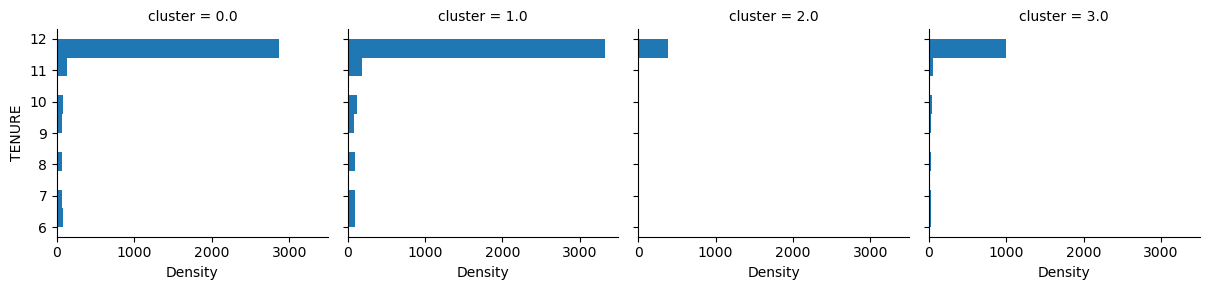

In [29]:
distribution_cluster(kmeans_lables)


Cluster 0: The distribution of various indicators such as account balance, consumption, and cash overdraft is relatively wide, and the overall activity level is high. It belongs to a typical group of highly active and high-limit customers.

Cluster 1: The account balance and consumption amount are relatively high, the installment consumption and repayment are active, the credit limit is relatively high, the purchase frequency is lower than that of Cluster 0, and it is targeted at high-quality customers with high consumption and good credit.

Cluster 2: All indicators (balance, consumption, overdraft, etc.) are generally low, the activity level is low, and the credit limit distribution is balanced, belonging to the low-activity customer group.

Cluster 3: Customer groups with high account balances but low consumption amounts and frequencies, high cash overdraft frequencies, high credit limits, and a tendency to rely on overdrafts with higher risks

## View the situations of each cluster of a feature

In [30]:
def view_feature_boxplot(feature,lables):
    clusters=pd.concat([train_data, pd.DataFrame({'cluster':lables})], axis=1)
    plt.figure(figsize=(15,6))
    sns.boxplot(x='cluster', y=feature, data=clusters)


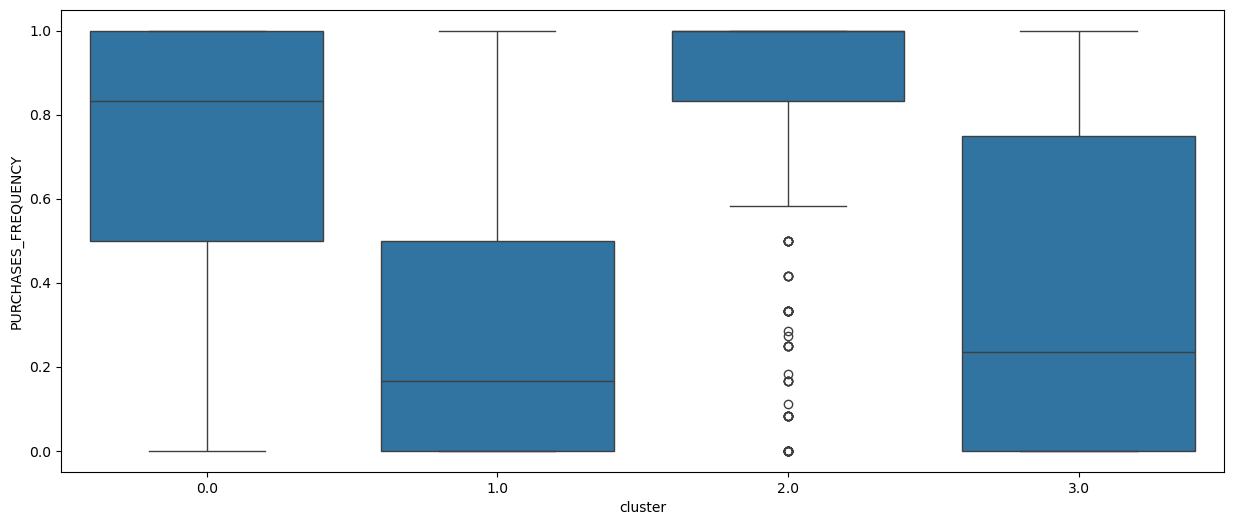

In [31]:
view_feature_boxplot('PURCHASES_FREQUENCY',kmeans_lables)

Users of Cluster 0 and Cluster 2 have a relatively high purchase frequency. Among them, users of Cluster 0 have the highest purchase frequency, and the purchase frequency of most users is close to  1 . This indicates that these users might be frequent shoppers and could be highly sensitive to promotional activities.

But, Cluster 2 has some outliers. The purchase frequency of these users is significantly lower than that of other users in this cluster. It may be necessary to further analyze the causes of these outliers, such as whether they are due to data errors or the influence of special events.


Users of Cluster 1 and Cluster 3 have a relatively low purchase frequency. Among them, users of Cluster 1 have the lowest purchase frequency, and the purchase frequency of most users is between 0.2 and 0.4. This indicates that these users might be occasional shoppers, and they might be more inclined towards planned consumption or be more sensitive to prices.

